In [ ]:
import pandas as pd
import numpy as np
from sklearn import cluster
data = pd.read_csv("/Spotify-2000.csv")
print(data.head())


   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

In [ ]:
numerical_cols = data.select_dtypes(include=['int'])

In [ ]:
numerical_cols.corr()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Year,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,-0.122472,0.085598,-0.003181
Energy,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,-0.665156,0.205865,0.103393
Danceability,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135769,0.125229,0.144344
Loudness (dB),0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.451635,0.125090,0.165527
Liveness,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,-0.046206,0.092594,-0.111978
Valence,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.239729,0.107102,0.095911
Acousticness,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,1.000000,-0.098256,-0.087604
Speechiness,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.098256,1.000000,0.111689
Popularity,-0.158962,-0.003181,0.103393,0.144344,0.165527,-0.111978,0.095911,-0.087604,0.111689,1.000000


<Axes: >

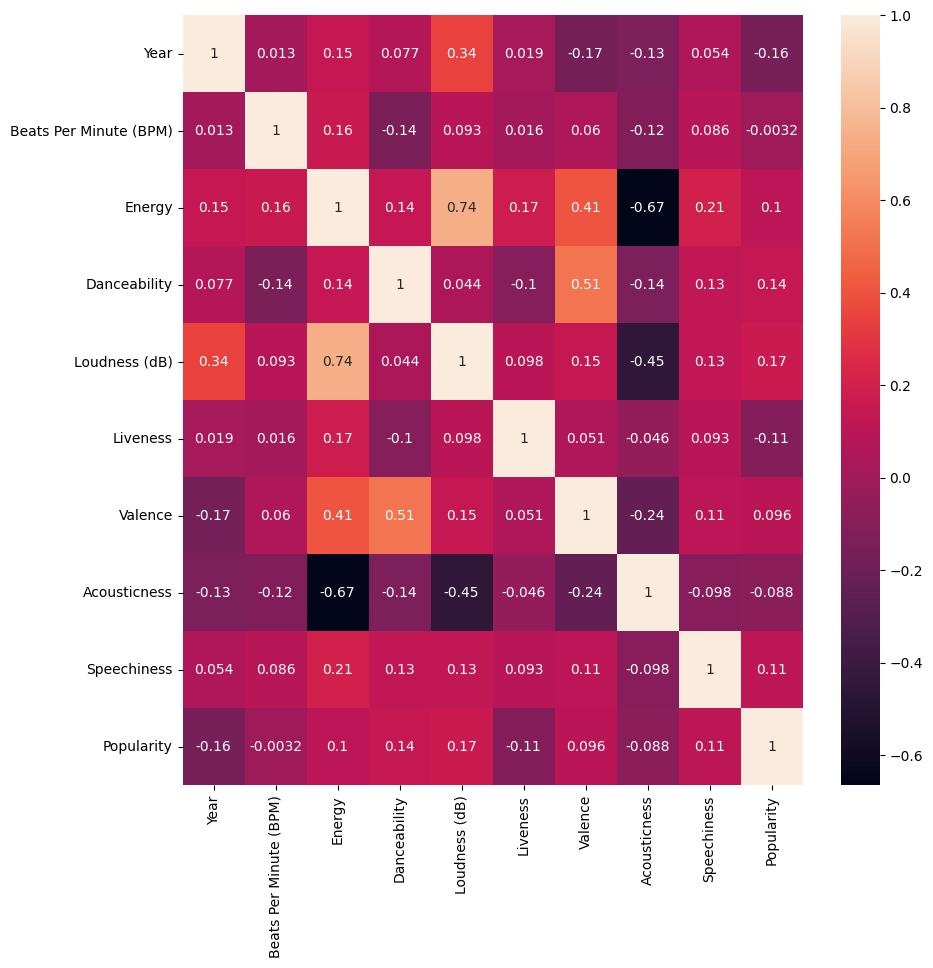

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_cols.corr(), annot=True)

In [ ]:
data2 = data[["Beats Per Minute (BPM)", "Loudness (dB)",
              "Liveness", "Valence", "Acousticness",
              "Speechiness"]]

from sklearn.preprocessing import MinMaxScaler
for i in data.columns:
    MinMaxScaler(i)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(data2)

In [ ]:
data["Music Segments"] = clusters
MinMaxScaler(data["Music Segments"])
data["Music Segments"] = data["Music Segments"].map({1: "Cluster 1", 2:
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5",
    6: "Cluster 6", 7: "Cluster 7", 8: "Cluster 8",
    9: "Cluster 9", 10: "Cluster 10"})

In [ ]:
print(data.head())

                    Title             Artist            Top Genre  Year  \
0                 Sunrise        Norah Jones      adult standards  2004   
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence Length (Duration)  Acousticness  Speechiness  Popularity  \
0       68           

In [ ]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["Music Segments"].unique()):


    PLOT.add_trace(go.Scatter3d(x = data[data["Music Segments"]== i]['Beats Per Minute (BPM)'],
                                y = data[data["Music Segments"] == i]['Energy'],
                                z = data[data["Music Segments"] == i]['Danceability'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))